In [1]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
ar_df = pd.read_csv('csv/air_reserve.csv', parse_dates=[1, 2])
avd_df = pd.read_csv('csv/air_visit_data.csv', parse_dates=[1])
hr_df = pd.read_csv('csv/hpg_reserve.csv', parse_dates=[1, 2])
sample_df = pd.read_csv('csv/sample_submission.csv')
di_df = pd.read_csv('csv/date_info.csv', parse_dates=[0])

In [3]:
avd_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [4]:
type(ar_df["visit_datetime"][1])

pandas._libs.tslib.Timestamp

In [5]:
ar_df_t = ar_df.drop(["reserve_datetime"],axis=1)
ar_df_t["visit_datetime"] = [x.split(' ')[0].replace('-','') for x in ar_df_t["visit_datetime"].astype(str)]
ar_df_t["visit_datetime"] = pd.to_datetime(ar_df_t["visit_datetime"],format='%Y%m%d')
ar_df_t = ar_df_t.groupby([ar_df_t["air_store_id"],ar_df_t["visit_datetime"]])["reserve_visitors"].sum()
ar_df_f = pd.DataFrame(ar_df_t)
ar_df_f.reset_index(inplace=True)
ar_df_f.columns=['id','date','res']

In [6]:
ar_df_f.to_csv("air_store_reserved_modified.csv",header=False,index=False)

In [8]:
ar_df_d = pd.DataFrame(ar_df_f.groupby("date")['reserve_visitors'].sum())
ar_df_d = ar_df_d.reset_index()

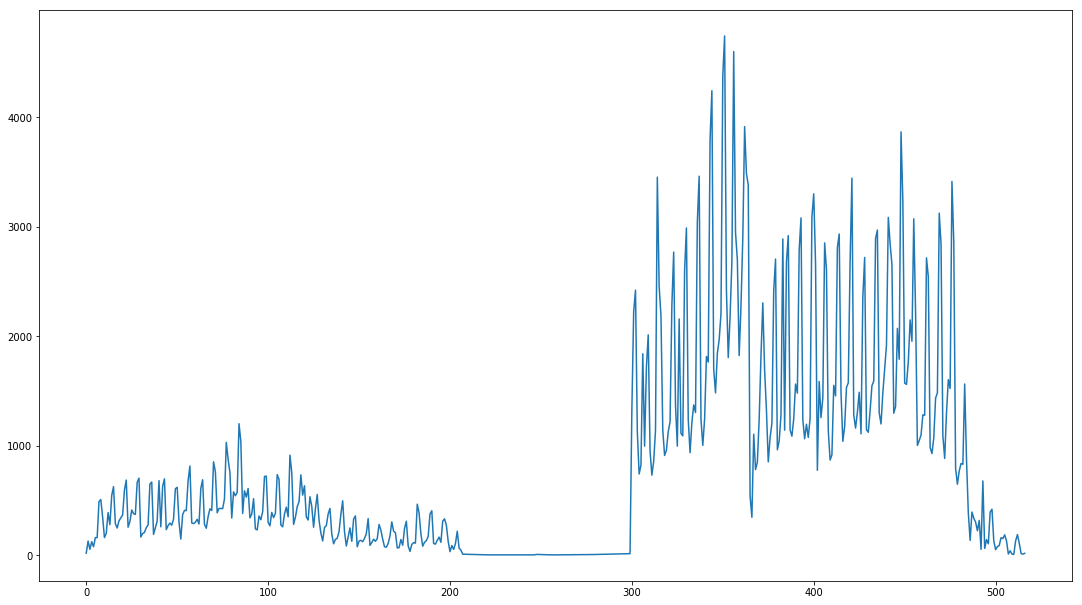

In [127]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
t = pd.to_datetime('20160101')
tt = [(pd.to_datetime(x, unit='s') - t).days for x in ar_df_d['date']]
plt.plot(tt,ar_df_d['res'],'-')
fig.savefig('reserve.png', dpi=100)

In [11]:
avd_df.columns = ['id','date','vis']
avd_df_t = avd_df.drop(["id"],axis=1)
#avd_df_t["visit_datetime"] = [x.split(' ')[0].replace('-','') for x in avd_df_t["visit_datetime"].astype(str)]
#avd_df_t["visit_datetime"] = pd.to_datetime(avd_df_t["visit_datetime"],format='%Y%m%d')
avd_df_t = avd_df_t.groupby([avd_df_t["date"]])["vis"].sum()
avd_df_f = pd.DataFrame(avd_df_t)
avd_df_f.reset_index(inplace=True)
avd_df_f = avd_df_f.set_index('date')
avd_df_f.head()

,vis
date,
2016-01-01,1033
2016-01-02,1764
2016-01-03,2368
2016-01-04,3326
2016-01-05,3927


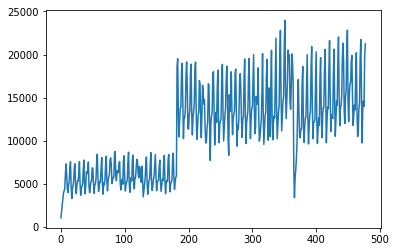

In [129]:
avd_df_d = avd_df_f.reset_index()
t = pd.to_datetime('20160101')
tt = [(pd.to_datetime(x, unit='s') - t).days for x in avd_df_d['date']]
plt.plot(tt,avd_df_d['vis'],'-')
fig.savefig('visit.png', dpi=100)

In [19]:
avd_df.head()

,id,date,vis
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [133]:
ar_try = ar_df_f.groupby('date').mean()
ar_try.to_csv('ar_try.csv')

In [22]:
ar = ar_df_f.merge(avd_df,how='inner')
ar = ar.sort_values('date')
ar = ar.reset_index()
ar = ar.drop('index',axis=1)
ar.head()

,id,date,res,vis
0,air_db80363d35f10926,2016-01-01,5,8
1,air_877f79706adbfb06,2016-01-01,3,3
2,air_db4b38ebe7a7ceff,2016-01-01,9,21
3,air_6b15edd1b4fbb96a,2016-01-02,11,96
4,air_f690c42545146e0a,2016-01-02,2,2


In [24]:
ar_m = ar['vis'] - ar['res']

In [90]:
ar['id'].unique().shape

(312,)

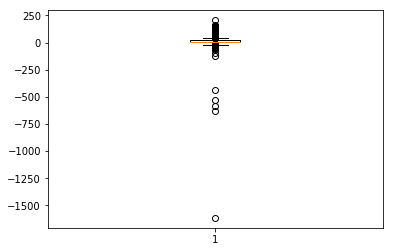

In [130]:
plt.boxplot(ar_m)
fig.savefig('vis-res.png', dpi=100)

In [42]:
sum(ar_m.abs() > 50)

602

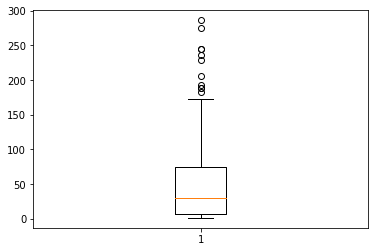

In [131]:
plt.boxplot(ar_new['id'].value_counts().values)
fig.savefig('count(10).png', dpi=100)

In [104]:
ar_c = ar_c.groupby('id')
ar_c.head()

,id,date,res,vis,c
0,air_db80363d35f10926,2016-01-01,5,8,1.0
1,air_877f79706adbfb06,2016-01-01,3,3,1.0
4,air_f690c42545146e0a,2016-01-02,2,2,1.0
7,air_789466e488705c93,2016-01-02,67,68,1.0
9,air_877f79706adbfb06,2016-01-02,4,12,1.0
18,air_789466e488705c93,2016-01-04,4,8,1.0
21,air_24b9b2a020826ede,2016-01-04,7,11,1.0
26,air_142e78ba7001da9c,2016-01-04,2,7,1.0
30,air_290e7a57b390f78e,2016-01-04,13,13,1.0
33,air_b9e27558fb8bd5c4,2016-01-05,5,12,1.0


In [31]:
len(ar_m)

28064

In [63]:
ar_new = ar[(ar['vis'] - ar['res']).abs()<10]

In [89]:
ar_new['id'].unique().shape

(272,)

In [64]:
len(ar_new)

13802

In [65]:
ar_new['vis'].corr(ar_new['res'])

0.96103009032971365

In [109]:
inf = pd.read_csv('newcsv/information.csv',index_col=0)

In [110]:
inf.head()

,air_store_id,hpg_store_id,genre,area_name
0,air_0f0cdeee6c9bf3d7,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
1,air_fee8dcf4d619598e,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
2,air_a17f0778617c76e2,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
3,air_83db5aff8f50478e,0,Italian/French,Tōkyō-to Minato-ku Shibakōen
4,air_99c3eae84130c1cb,0,Italian/French,Tōkyō-to Minato-ku Shibakōen


In [84]:
inf = inf.drop(['hpg_store_id'],axis=1)
inf = inf[inf['air_store_id']!=0]
inf.head()

,air_store_id,genre,area_name
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
1,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
2,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
3,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen
4,air_99c3eae84130c1cb,Italian/French,Tōkyō-to Minato-ku Shibakōen


In [112]:
hr_df_t = hr_df.drop(["reserve_datetime"],axis=1)
hr_df_t["visit_datetime"] = [x.split(' ')[0].replace('-','') for x in hr_df_t["visit_datetime"].astype(str)]
hr_df_t["visit_datetime"] = pd.to_datetime(hr_df_t["visit_datetime"],format='%Y%m%d')
hr_df_t = hr_df_t.groupby([hr_df_t["hpg_store_id"],hr_df_t["visit_datetime"]])["reserve_visitors"].sum()
hr_df_f = pd.DataFrame(hr_df_t)
hr_df_f.reset_index(inplace=True)
hr_df_f.head()

,hpg_store_id,visit_datetime,reserve_visitors
0,hpg_001112ef76b9802c,2016-02-26,9
1,hpg_001112ef76b9802c,2016-03-17,3
2,hpg_001112ef76b9802c,2016-03-31,5
3,hpg_001112ef76b9802c,2016-04-05,13
4,hpg_001112ef76b9802c,2016-04-18,9


In [96]:
ar_df_f.to_csv("hpg_store_reserved_modified.csv",header=False,index=False)

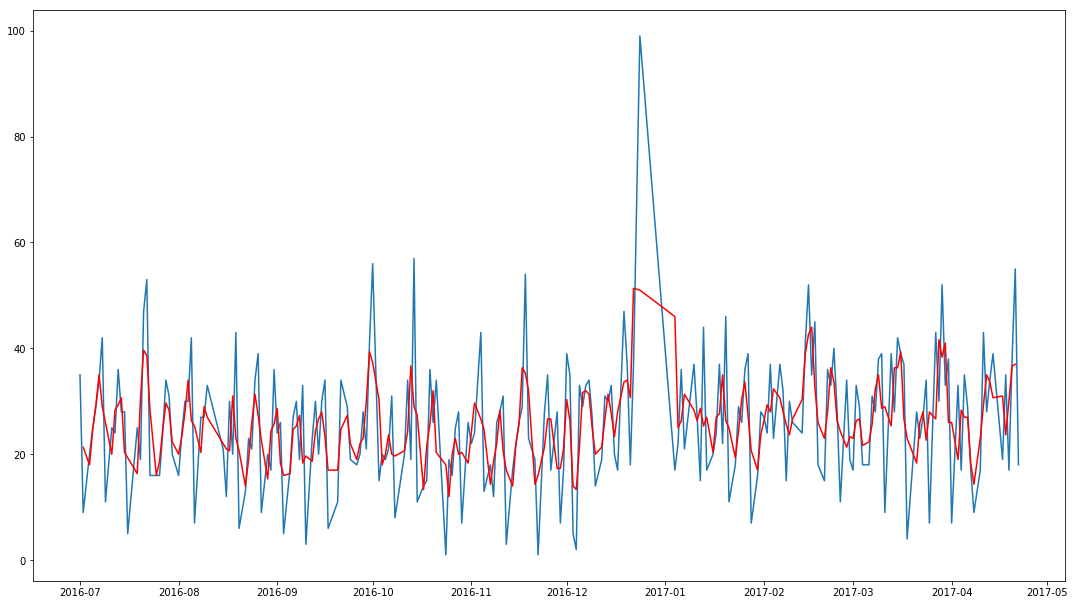

In [101]:
air_visit_group = avd_df.groupby(['air_store_id', 'visit_date'], as_index=False).sum()
test_id = air_visit_group['air_store_id'].unique()[0]

test_visit = air_visit_group[air_visit_group['air_store_id'] == test_id]
test_visit_visitors = np.array(test_visit['visitors'].values, dtype=float)
test_visit_date = test_visit['visit_date'].values

test_df = pd.DataFrame(test_visit_visitors, index=test_visit_date)
test_decomp = seasonal_decompose(test_df, freq=3)
test_trend = test_decomp.trend
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(test_df)
plt.plot(test_trend, color='red')
plt.show()
fig.savefig('test2png.png', dpi=100)

In [102]:
test_trend.values

array([[         nan],
       [ 21.33333333],
       [ 18.        ],
       [ 24.66666667],
       [ 29.33333333],
       [ 35.        ],
       [ 29.        ],
       [ 26.        ],
       [ 20.        ],
       [ 28.33333333],
       [ 29.33333333],
       [ 30.66666667],
       [ 20.33333333],
       [ 19.33333333],
       [ 16.33333333],
       [ 30.33333333],
       [ 39.66666667],
       [ 38.66666667],
       [ 28.33333333],
       [ 16.        ],
       [ 18.66666667],
       [ 24.66666667],
       [ 29.66666667],
       [ 28.33333333],
       [ 22.33333333],
       [ 20.        ],
       [ 23.33333333],
       [ 28.        ],
       [ 34.        ],
       [ 26.33333333],
       [ 25.33333333],
       [ 20.33333333],
       [ 29.        ],
       [ 27.        ],
       [ 22.        ],
       [ 21.        ],
       [ 20.66666667],
       [ 31.        ],
       [ 23.        ],
       [ 20.66666667],
       [ 14.        ],
       [ 19.        ],
       [ 26.        ],
       [ 31

In [103]:
def air_visit_trend(store_id, visit_group):
    store_visit = visit_group[visit_group['air_store_id'] == store_id]
    store_visit_visitors = np.array(store_visit['visitors'].values, dtype=float)
    store_visit_date = store_visit['visit_date'].values
    
    store_df = pd.DataFrame(store_visit_visitors, index=store_visit_date)
    decomp = seasonal_decompose(store_df, freq=3)
    trend = decomp.trend
    return trend

In [104]:
air_visit_group = avd_df.groupby(['air_store_id', 'visit_date'], as_index=False).sum()
trend_array = np.array([])
for store_id in air_visit_group['air_store_id'].unique():
    trend = air_visit_trend(store_id, air_visit_group)
    trend_array = np.append(trend_array, trend)

In [105]:
trend_array.size

252108

In [106]:
ar_df.drop('visit_datetime', axis=1, inplace=True)

In [122]:
hr_df.groupby(['hpg_store_id', 'reserve_datetime'], as_index=False).sum()

,hpg_store_id,reserve_datetime,reserve_visitors
0,hpg_001112ef76b9802c,2016-02-09 13:00:00,9
1,hpg_001112ef76b9802c,2016-03-03 19:00:00,3
2,hpg_001112ef76b9802c,2016-03-25 19:00:00,5
3,hpg_001112ef76b9802c,2016-04-01 10:00:00,13
4,hpg_001112ef76b9802c,2016-04-15 12:00:00,9
5,hpg_001112ef76b9802c,2016-06-24 13:00:00,9
6,hpg_001112ef76b9802c,2016-06-29 16:00:00,3
7,hpg_001112ef76b9802c,2016-07-08 14:00:00,5
8,hpg_001112ef76b9802c,2016-08-01 15:00:00,3
9,hpg_001112ef76b9802c,2016-08-20 12:00:00,6
